<a href="https://colab.research.google.com/github/pyefiuna/Laboratorio/blob/master/notebooks/Semana%204/Ejercicios_Propuestos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import norm
from math import sqrt
import random
import matplotlib.pyplot as plt
import numpy as np

# Ejercicio 1

Un experimento consiste en lanzar un dado varias veces. Determine la
probabilidad de que aparezca:

## Ítem a
La cara 6, entre 29 y 32 inclusive, si el dado es lanzado 180 veces.

In [ ]:
N = 180 # número de ensayos
p = 1/6 # probabilidad de éxito
q = 1-p # probabilidad de fallar
mu = N*p # media
sigma = sqrt(N*p*q) # desviación estándar
dist_dados = norm(loc = mu, scale = sigma) # distribución normal

In [11]:
print(f'Probabilidad: {(dist_dados.cdf(32.5)-dist_dados.cdf(28.5))*100} %')

Probabilidad: 30.937388346296572 %


## Ítem b
La cara 6, menos de 22 veces, si el dado es lanzado 180 veces.

In [14]:
print(f'Probabilidad: {dist_dados.cdf(21.5)*100} %')

Probabilidad: 4.456546275854304 %


## Ítem c
La cara 6, exactamente 30 veces, si el dado es lanzado 180 veces.

In [13]:
print(f'Probabilidad: {(dist_dados.cdf(30.5)-dist_dados.cdf(29.5))*100} %')

Probabilidad: 7.965567455405798 %


## Comprobación de los resultados

In [17]:
pruebas = [random.randint(1,6) for i in range(N)] # se hacen 180 ensayos con distribución uniforme
print(pruebas)

[3, 3, 2, 6, 2, 1, 5, 1, 4, 1, 4, 4, 4, 5, 1, 1, 6, 2, 4, 5, 6, 2, 6, 5, 4, 3, 5, 4, 4, 5, 2, 4, 3, 1, 4, 6, 6, 2, 4, 5, 1, 4, 2, 5, 3, 4, 4, 1, 2, 5, 6, 2, 2, 3, 1, 3, 3, 6, 6, 1, 2, 6, 1, 2, 3, 5, 6, 5, 1, 5, 1, 6, 5, 5, 1, 2, 3, 5, 1, 6, 1, 1, 1, 1, 6, 6, 2, 3, 4, 5, 4, 2, 3, 5, 4, 2, 1, 2, 2, 6, 3, 4, 4, 3, 2, 5, 5, 5, 6, 1, 4, 2, 4, 5, 4, 6, 2, 1, 2, 5, 2, 3, 2, 3, 6, 2, 1, 5, 5, 5, 6, 4, 1, 3, 1, 5, 4, 6, 2, 4, 4, 2, 1, 6, 3, 5, 6, 1, 2, 4, 4, 1, 6, 2, 4, 4, 5, 5, 5, 5, 1, 6, 4, 5, 4, 2, 5, 1, 3, 2, 5, 6, 1, 5, 6, 4, 3, 4, 1, 5]


In [19]:
pruebas.count(6)
# Para el ítem a, verificar si el número está entre 29 y 32 (esto ocurre con un 31 % de probabilidad)
# Para el ítem b, verificar si este número es menor que 22 (esto ocurre con un 4.5 % de probabilidad)
# Para el ítem c, verificar si este número es 30 (esto ocurre con un 8 % de probabilidad)
# Por ende, lo más probable es que se cumpla el ítem a (de cumplirse alguno de los ítems)

27

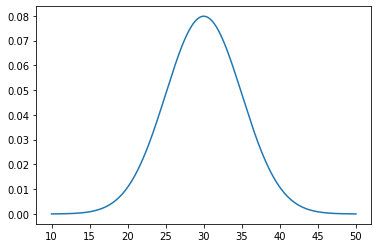

In [23]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, dist_dados.pdf(x))
plt.show()